In [252]:
import numpy as np
import pandas as pd
import matplotlib
import math
from scipy import stats
from scipy.stats import hypergeom
from matplotlib.ticker import FuncFormatter
from scipy.stats import uniform

import seaborn as sns
import matplotlib.pyplot as plt

# Part 1

**a. Construct a tabular probability distribution for X.**

In [253]:
nums=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [302]:
def nCr(n,r):
    f=math.factorial
    return f(n)/(f(r)*f(n-r))

N,k,n=90,20,20
res_a=[]

for num in nums:
    temp=nCr(k,num)*nCr(N-k,n-num)/nCr(N,n)
    res_a.append(round(temp,6))

df_a=pd.DataFrame({'x-Number of Matches':nums,
                  'P(X=x)':res_a})
df_a.set_index('x-Number of Matches',inplace=True)
df_a.head()

,P(X=x)
x-Number of Matches,
0,0.003175
1,0.024905
2,0.086450
3,0.176161
4,0.235698


**b. Construct a tabular cumulative probability distribution for X.**

In [303]:
res_b=[res_a[0]]
temp=res_a[0]
for i in range(1,len(res_a)):
    temp+=res_a[i]
    res_b.append(temp)
    
df_b=pd.DataFrame({'x-Number of Matches':nums,
                  'P(X=x)':res_a,
                  'P(X≤x)':res_b})
df_b.set_index('x-Number of Matches',inplace=True)
df_b.head()

,P(X=x),P(X≤x)
x-Number of Matches,,
0,0.003175,0.003175
1,0.024905,0.028080
2,0.086450,0.114530
3,0.176161,0.290691
4,0.235698,0.526389


**c. Create a graphical probability distribution for X.**

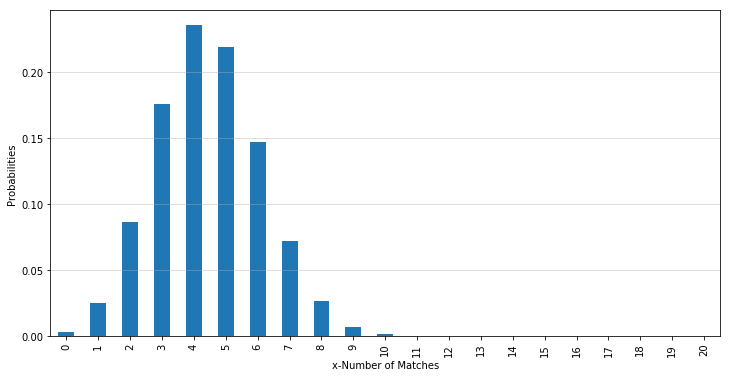

In [209]:
df_a['P(X=x)'].plot(kind='bar',figsize=(12,6))
plt.ylabel('Probabilities')
plt.grid(axis='y',alpha=0.5)

**d. Create a graphical cumulative probability distribution for X.**

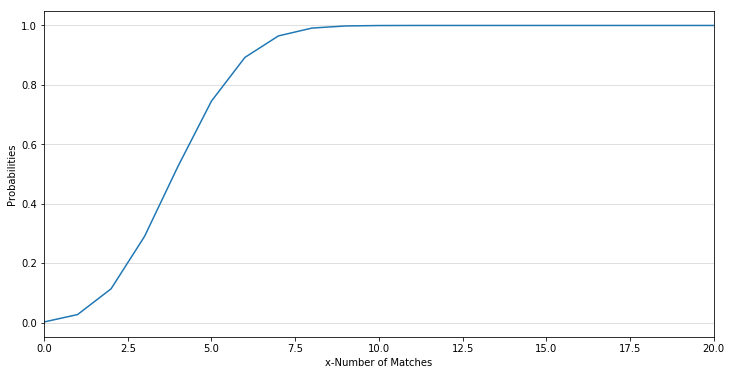

In [210]:
df_b['P(X≤x)'].plot(figsize=(12,6))
plt.ylabel('Probabilities')
plt.grid(axis='y',alpha=0.5)

**e. Calculate the theoretical expected value (mean), the theoretical variance, and the theoretical standard deviation of X in the spaces provided for those quantities. Interpret those values in your Word report.**

In [304]:
mean=0
i=0
for p in df_a['P(X=x)']:
    mean+=p*i
    i+=1

i=0
sum=0
for p in df_a['P(X=x)']:
    sum+=(i**2)*p
    i+=1
variance=sum-mean**2

sd=variance**0.5

In [305]:
df_e=pd.DataFrame({'Theoretical':[round(mean,6),round(variance,6),round(sd,6)]},
                   index=['Expected Value of X','Variance of X','SD of X'])

df_e

,Theoretical
Expected Value of X,4.444439
Variance of X,2.718817
SD of X,1.648884


**f. Generate 1000 random values according to the standard uniform probability distribution.**

In [306]:
data_uniform = uniform.rvs(size=1000,loc=0,scale=1)
    
df_f=pd.DataFrame({'R-Standard Uniform':data_uniform})
df_f.head()

,R-Standard Uniform
0,0.252931
1,0.453770
2,0.369893
3,0.611509
4,0.181205


**g. Use the available tabular cumulative distribution of part (b) to randomly generate 1000 values of X according to the described Hyper-geometric probability distribution.**

In [307]:
N,k,n=90,20,20
simulated_x=[]
for i in range(1000):
    simulated_x.append(hypergeom.ppf(np.random.choice(df_b['P(X≤x)']), N, n, k, loc=0))


In [308]:
df_g=pd.DataFrame({'R-Standard Uniform':random,
                  'Simulated x':simulated_x})

df_g.head()

,R-Standard Uniform,Simulated x
0,0.880190,13.0
1,0.136561,12.0
2,0.106972,13.0
3,0.729245,13.0
4,0.323914,6.0


**h. Calculate the experimental (simulated) expected value (mean), the experimental variance, and the experimental standard deviation of X in the spaces provided for those quantities.**

In [314]:
Smean=0
i=0
for i in range(1000):
    Smean+=df_g['Simulated x'][i]*df_g['R-Standard Uniform'][i]
Smean=Smean/1000
    
Svariance=0
for i in range(1000):
    Svariance+=((df_g['Simulated x'][i])**2)*df_g['R-Standard Uniform'][i]

Svariance=(Svariance-Smean**2)/1000

Ssd=Svariance**0.5

In [315]:
df_h=pd.DataFrame({'Theoretical':[round(mean,6),round(variance,6),round(sd,6)],
                  'Experimental (Simulated)':[round(Smean,6),round(Svariance,6),round(Ssd,6)]},
                   index=['Expected Value of X','Variance of X','SD of X'])
df_h

,Theoretical,Experimental (Simulated)
Expected Value of X,4.444439,4.340120
Variance of X,2.718817,47.455698
SD of X,1.648884,6.888810


**i. Calculate the experimental means successively after n = 20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, and 1000 simulations.**

In [223]:
Xsimulated=[]

def experiment(num):
    random=np.random.rand(num)
    for i,r in enumerate(random):
        random[i]=round(r,6)

    N,k,n=90,20,20
    Xsimulated=[]
    for i in range(num):
        Xsimulated.append(hypergeom.ppf(np.random.choice(df_b['P(X≤x)']), N, n, k, loc=0))
        
    df=pd.DataFrame({'R-Standard Uniform':random,
                  'Simulated x':Xsimulated})   
    return df

def calMean(df,num):
    mean=0
    i=0
    for i in range(num):
        mean+=df_g['R-Standard Uniform'][i]*df_g['Simulated x'][i]
    mean=mean/num
    return mean
    

In [233]:
nums=[20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
Xmean=[]
for num in nums:
    df=experiment(num)
    mean=calMean(df,num)
    Xmean.append(mean)


In [234]:
df_i=pd.DataFrame({'n-Number of Simulations':nums,
                  'The Experimental Mean of X':Xmean})  
#df_i.set_index('n-Number of Simulations',inplace=True)
df_i

,n-Number of Simulations,The Experimental Mean of X
0,20,4.564440
1,40,4.931866
2,60,4.540299
3,80,4.489471
4,100,4.584434
5,200,4.504605
6,300,4.576825
7,400,4.472447
8,500,4.438988
9,600,4.501246


**j. For the same values of n, calculate the Theoretical mean of X. Use the fixed value of the theoretical mean calculated in part (e).**

In [235]:
df_j=pd.DataFrame({'n-Number of Simulations':nums,
                  'The Experimental Mean of X':Xmean,
                  'The Theoretical Mean of X':[df_e['Theoretical'][0]]*14})  
#df_j.set_index('n-Number of Simulations',inplace=True)
df_j

,n-Number of Simulations,The Experimental Mean of X,The Theoretical Mean of X
0,20,4.564440,4.444439
1,40,4.931866,4.444439
2,60,4.540299,4.444439
3,80,4.489471,4.444439
4,100,4.584434,4.444439
5,200,4.504605,4.444439
6,300,4.576825,4.444439
7,400,4.472447,4.444439
8,500,4.438988,4.444439
9,600,4.501246,4.444439


**k. Create a line plot of the Experimental mean values versus the number of simulations (n). Add the horizontal line plot displaying the theoretical mean of X. Run several simulations of the successive experimental means. Interpret your observation in the context of the Law of Large Numbers (as the number of simulations become larger, the experimental values of the means approach to their theoretical value).**

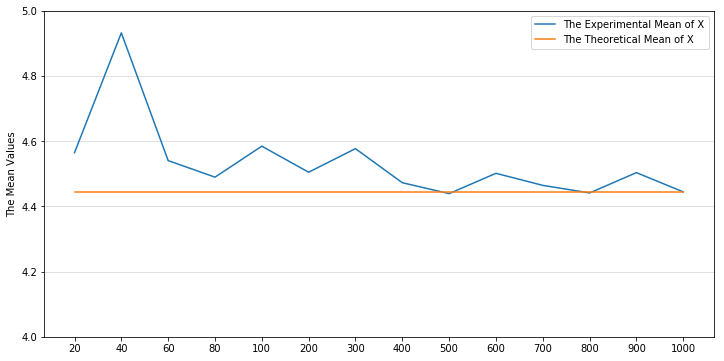

In [245]:
x=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
fig,ax=plt.subplots(figsize=(12,6))
my_xticks= [20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(x,my_xticks)
ax.plot(x,df_j[['The Experimental Mean of X']])
ax.plot(x,df_j[['The Theoretical Mean of X']])
ax.set_ylabel('The Mean Values')
ax.set_ylim(4,5)

plt.grid(axis='y',alpha=0.5)
plt.legend(['The Experimental Mean of X','The Theoretical Mean of X'])

# Part 2

**a. A normal population is given in column E of the worksheet. Calculate the mean, the variance, and the standard deviation of this population.**

In [37]:
df2_a=pd.read_excel('Module 3 Project_Keno_v3(1).xlsx',sheet_name='Part 2')
df2_a=df2_a[['X - A Normal Population']]
df2_a['X-A Normal Population']=df2_a['X - A Normal Population']
df2_a.drop('X - A Normal Population',axis=1,inplace=True)
df2_a.head()

,X-A Normal Population
0,191
1,170
2,226
3,208
4,199


In [38]:
df2_a.describe()

,X-A Normal Population
count,1000.000000
mean,199.206000
std,18.209315
min,144.000000
25%,188.000000
50%,199.000000
75%,212.000000
max,256.000000


In [33]:
df2_a=pd.DataFrame({'Population':[199.206,331.248,18.209]},
                   index=['Mean of X','Variance of X','SD of X']) 
df2_a

,Population
Mean of X,199.206
Variance of X,331.248
SD of X,18.209


**b. Construct a Relative Frequency Histogram of the given population. Discuss the shape of the distribution in your report.**

In [175]:
temp=df2_a
df2_b.reset_index(inplace=True)
df2_b.rename(columns={'level_0':'Frequency'},inplace=True)
df2_b=temp.groupby('X-A Normal Population').count()

df2_b['Relative Frequency']=(df2_b['Frequency']/(df2_b["Frequency"].sum()))*100
df2_b.drop('index',axis=1,inplace=True)
df2_b.reset_index(inplace=True)
df2_b.head()

,X-A Normal Population,Frequency,Relative Frequency
0,144,1,0.1
1,148,1,0.1
2,152,2,0.2
3,154,5,0.5
4,155,1,0.1


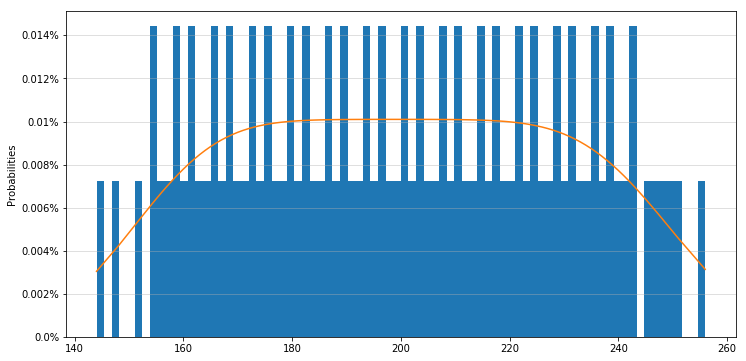

In [251]:
def to_percent(y, position):
    s = str(y)

    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

kde = stats.gaussian_kde(df2_b['X-A Normal Population'])

#plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df2_b['X-A Normal Population'],density=True,bins=80)
ax.plot(df2_b['X-A Normal Population'], kde(df2_b['X-A Normal Population']))

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Probabilities')
plt.grid(axis='y',alpha=0.5)

**c. Using the random sampling method in R, randomly draw 30 samples with each sample consisting of 30 measurements from this population.**

In [40]:
def findsample():
    lst=[]
    for i in range(30):
        lst.append(np.random.choice(df2_a['X-A Normal Population']))
    return lst

samples={}
for i in range(30):
    samples['sample'+str(i)]=findsample()
    

df2_c=pd.DataFrame(samples)

df2_c.head()   

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample20,sample21,sample22,sample23,sample24,sample25,sample26,sample27,sample28,sample29
0,188,176,191,187,194,207,170,212,184,197,...,233,231,196,165,206,225,210,238,209,195
1,191,199,217,185,192,204,184,180,205,209,...,226,186,213,186,207,213,210,193,199,214
2,184,197,190,193,196,185,184,192,186,220,...,188,196,212,179,187,220,208,232,197,206
3,248,204,165,185,199,179,202,161,165,205,...,199,175,182,193,216,178,209,207,200,175
4,215,202,191,199,220,190,187,185,207,214,...,154,214,211,209,222,237,178,174,195,185


**d. For each sample, calculate the sample mean, the sample variance, and the sample standard deviation in the designated cells.**

In [41]:
df2_d={}
for i in range(30):
    mean=np.mean(df2_c['sample'+str(i)])
    variance=np.var(df2_c['sample'+str(i)])
    std=np.std(df2_c['sample'+str(i)])
    df2_d['sample'+str(i)]=[round(mean,3),round(variance,3),round(std,3)]
        
df2_d=pd.DataFrame(df2_d,index=['Sample Mean','Sample Variance','Sample SD'])
df2_d

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample20,sample21,sample22,sample23,sample24,sample25,sample26,sample27,sample28,sample29
Sample Mean,193.067,201.600,200.700,199.267,200.400,196.767,200.800,198.233,189.900,194.733,...,202.667,197.167,199.367,191.367,195.367,202.267,202.633,203.133,204.100,199.400
Sample Variance,524.729,255.307,309.143,189.462,298.773,323.712,304.093,308.846,286.423,306.329,...,508.222,286.339,224.966,300.166,259.566,366.996,228.099,424.849,282.423,288.507
Sample SD,22.907,15.978,17.582,13.765,17.285,17.992,17.438,17.574,16.924,17.502,...,22.544,16.922,14.999,17.325,16.111,19.157,15.103,20.612,16.805,16.985


**e. Calculate the average of 30 sample means, the average of 30 sample variances, and the average of 30 sample standard deviations.**

In [61]:
lst=[]
i=0
while i<3:
    sum=0
    for j in range(30):
        sum+=df2_d['sample'+str(j)][i]
    lst.append(sum/30)
    i+=1
    
df2_e=pd.DataFrame({'Samples':lst},
                   index=['Average of 30 Sample means','Average of 30 Sample variances','Average of 30 Sample SDs']) 
df2_e

,Samples
Average of 30 Sample means,198.623333
Average of 30 Sample variances,318.616300
Average of 30 Sample SDs,17.724800


**f. Compare your results of part (e) above with those obtained for the population in part (a). Discuss similarities and contrasts in the context of the Central Limit Theorem.**

please see report for this part.

**g. Construct a relative frequency histogram for the 30 sample means obtained from part (e) above. Comment on the shape of the distribution of the sample means.**

In [107]:
df2_g={}
i=0
columns=['Sample Mean','Sample Variance','Sample SD']
while i<3:
    for j in range(30):
        if columns[i] not in df2_g.keys():
            df2_g[columns[i]]=[df2_d['sample'+str(j)][i]]
        else:
            df2_g[columns[i]].append(df2_d['sample'+str(j)][i])
    i+=1

df2_g=pd.DataFrame(df2_g)
for i,mean in enumerate(df2_g['Sample Mean']):
    df2_g['Sample Mean'][i]=round(mean,1)
    

df2_g.head()

,Sample Mean,Sample Variance,Sample SD
0,193.1,524.729,22.907
1,201.6,255.307,15.978
2,200.7,309.143,17.582
3,199.3,189.462,13.765
4,200.4,298.773,17.285


In [108]:
df2_g=df2_g.groupby('Sample Mean').count()
df2_g.rename(columns={'Sample Variance':'Frequency','Sample SD':'Relative Frequency'},inplace=True)
df2_g['Relative Frequency']=(df2_g['Frequency']/(df2_g["Frequency"].sum()))*100
df2_g.reset_index(inplace=True)
df2_g.head()

,Sample Mean,Frequency,Relative Frequency
0,189.9,1,3.333333
1,191.4,1,3.333333
2,192.7,1,3.333333
3,193.1,1,3.333333
4,194.1,1,3.333333


<Figure size 864x432 with 0 Axes>

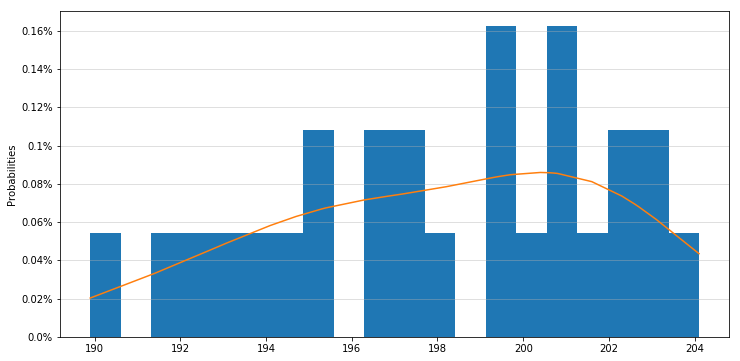

In [121]:
def to_percent(y, position):
    s = str(y)

    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

kde = stats.gaussian_kde(df2_g['Sample Mean'])

plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df2_g['Sample Mean'],density=True,bins=20)
ax.plot(df2_g['Sample Mean'], kde(df2_g['Sample Mean']))

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Probabilities')
plt.grid(axis='y',alpha=0.5)